### Music & Mental Health Survey Results EDA
Link to Dataset: (https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read dataset
mxmh_df = pd.read_csv('../data/mxmh_survey_results.csv')
mxmh_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
mxmh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

#### Age

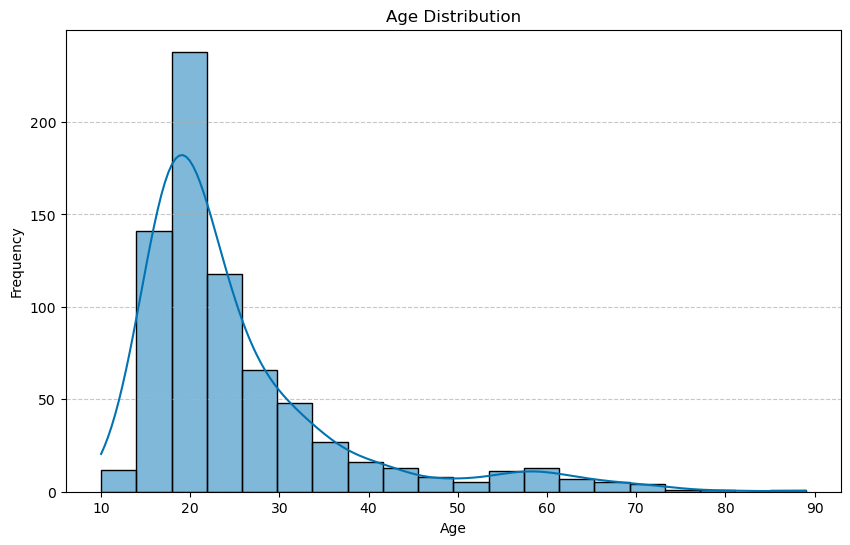

In [ ]:
# Plot histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(mxmh_df['Age'], bins=20, kde=True, color=sns.color_palette("colorblind")[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
mxmh_df['Age'].describe()

count    735.000000
mean      25.206803
std       12.054970
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

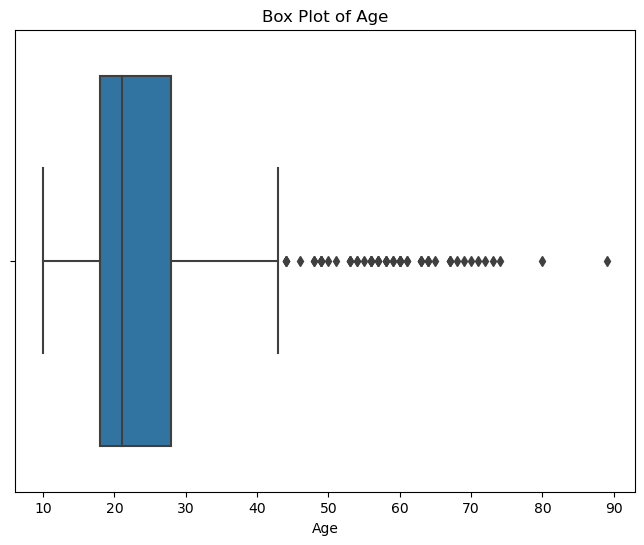

In [ ]:
# Box plot of Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=mxmh_df['Age'])
plt.title('Box Plot of Age')
plt.show()

Most individuals between late teens and late twenties. The youngest survey respondant was 10 and the oldest was 89!

#### Streaming Behaviors

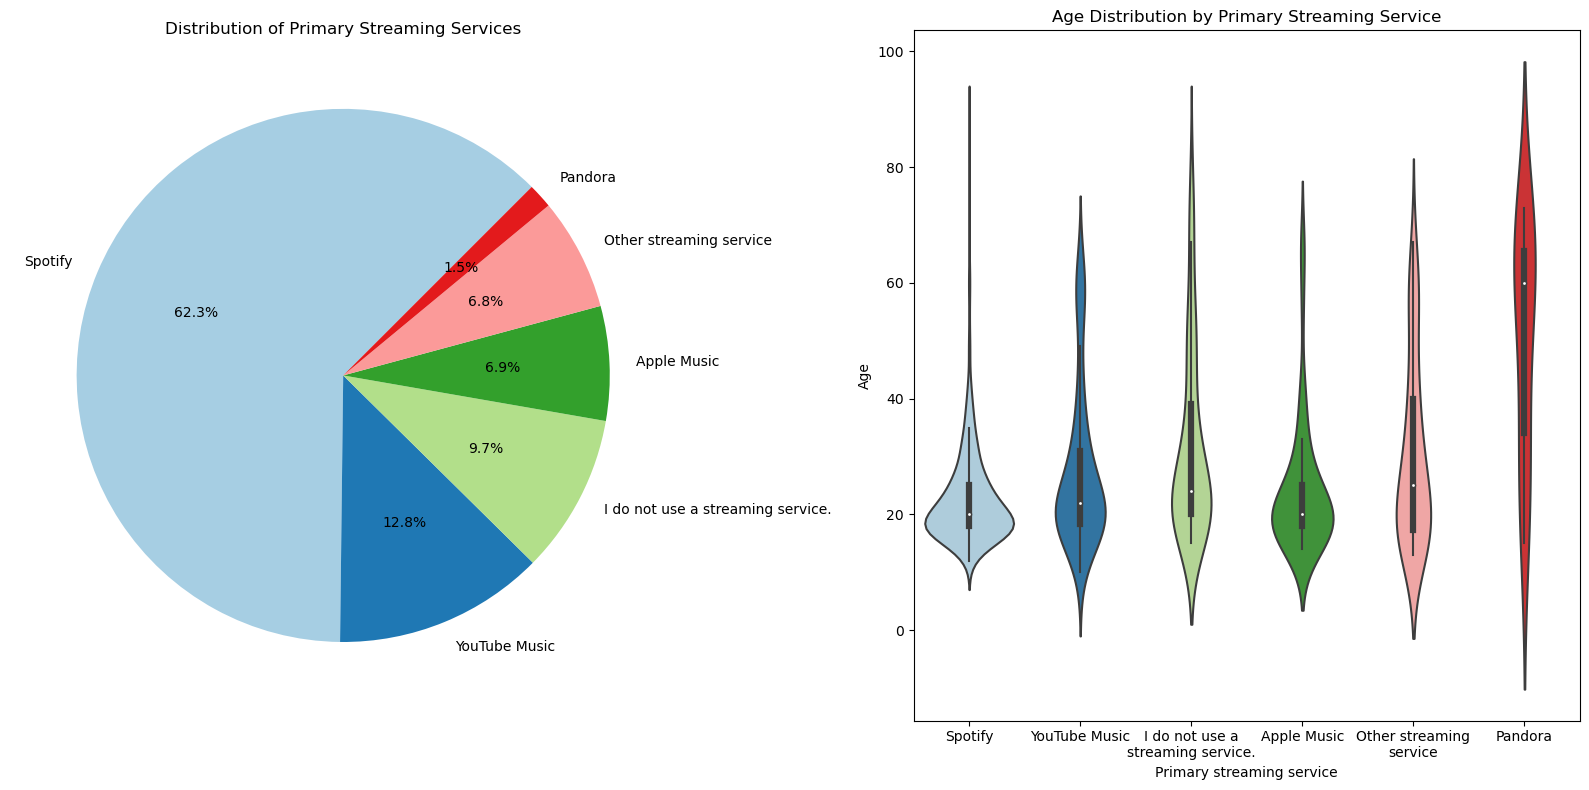

In [ ]:
# Count of indicated primary streaming services
service_counts = mxmh_df['Primary streaming service'].value_counts()

plt.figure(figsize=(16, 8))
colors = sns.color_palette('Paired', n_colors=len(service_counts))

# Pie chart of primary streaming services
plt.subplot(1, 2, 1)
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Distribution of Primary Streaming Services')

# Violin plot of age distribution and primary streaming service
plt.subplot(1, 2, 2)
ax = sns.violinplot(x='Primary streaming service', y='Age', data=mxmh_df, palette=colors, order=service_counts.index)
plt.title('Age Distribution by Primary Streaming Service')
labels = [textwrap.fill(label.get_text(), width=20) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

Very large Spotify following and there seems to be an older age group that uses Pandora. Youtube Music also has a small uptick around the 60 y/o user base.

In [ ]:
# Create some age groups for easier visualization
age_bins = [0, 18, 25, 35, 45, 55, 100] 
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55+']
mxmh_df['Age Group'] = pd.cut(mxmh_df['Age'], bins=age_bins, labels=age_labels)

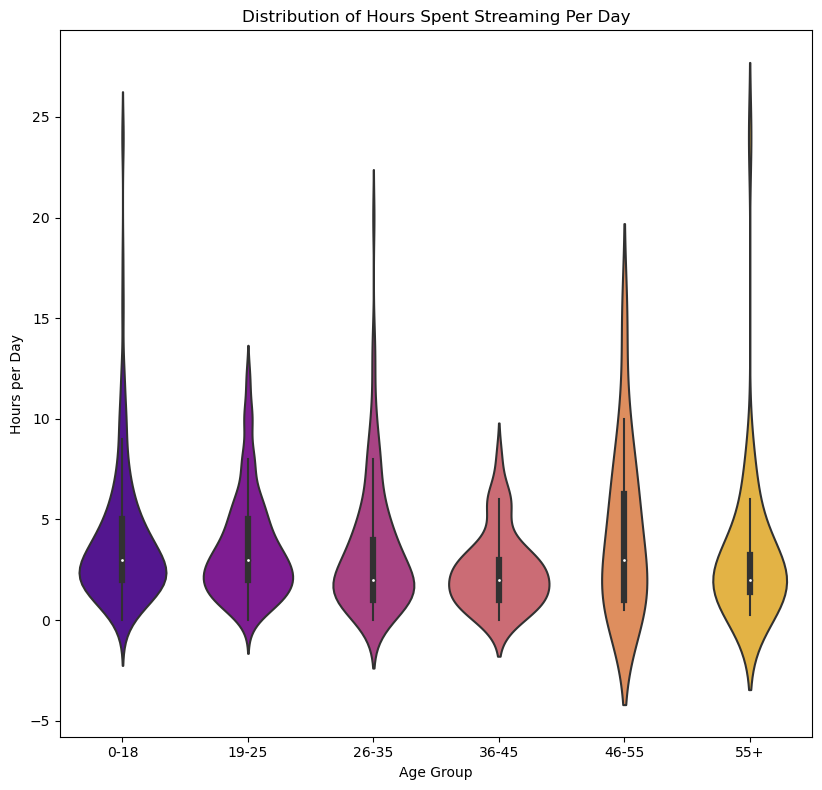

In [ ]:
plt.figure(figsize=(16, 8))

# Violin plot for distribution of hours spent streaming per day
plt.subplot(1, 2, 1)
sns.violinplot(x='Age Group', y='Hours per day', data=mxmh_df, palette='plasma')
plt.title('Distribution of Hours Spent Streaming Per Day')
plt.xlabel('Age Group')
plt.ylabel('Hours per Day')

plt.tight_layout()
plt.show()

Most respondents listen to music between 0-5 hours per day. Some outliers who apparently don't sleep, only music, all day.

#### Music Preferences

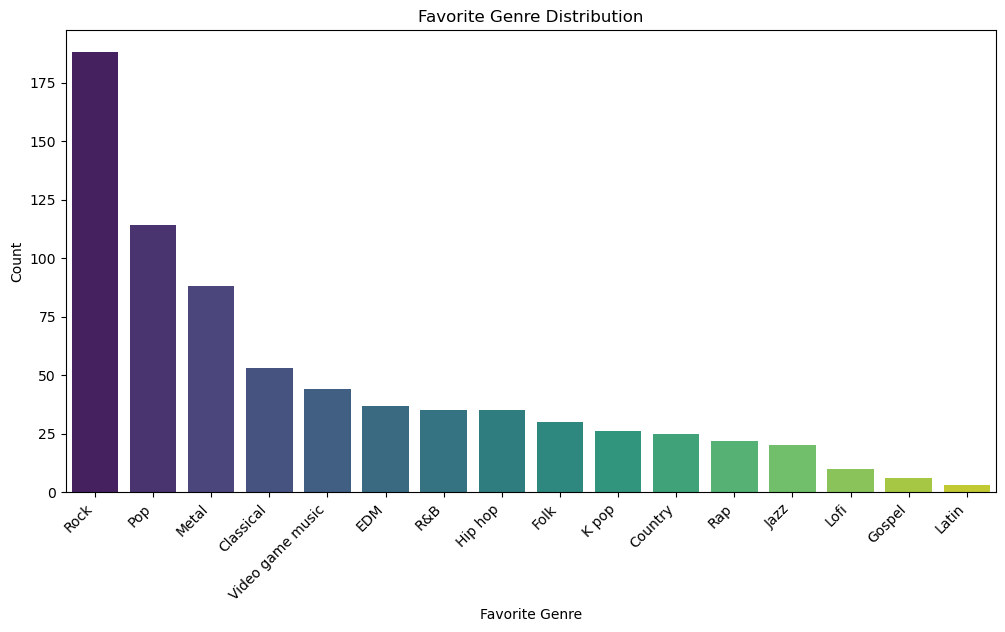

In [ ]:
genre_counts = mxmh_df['Fav genre'].value_counts()

# Create a bar plot of favorite genre distribution for all respodents
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Favorite Genre Distribution')
plt.xlabel('Favorite Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()

Rock, Pop, and surprisingly Metal in the top 3 reported favorite genres. Low Latin and Gospel representation.

#### Mental Health

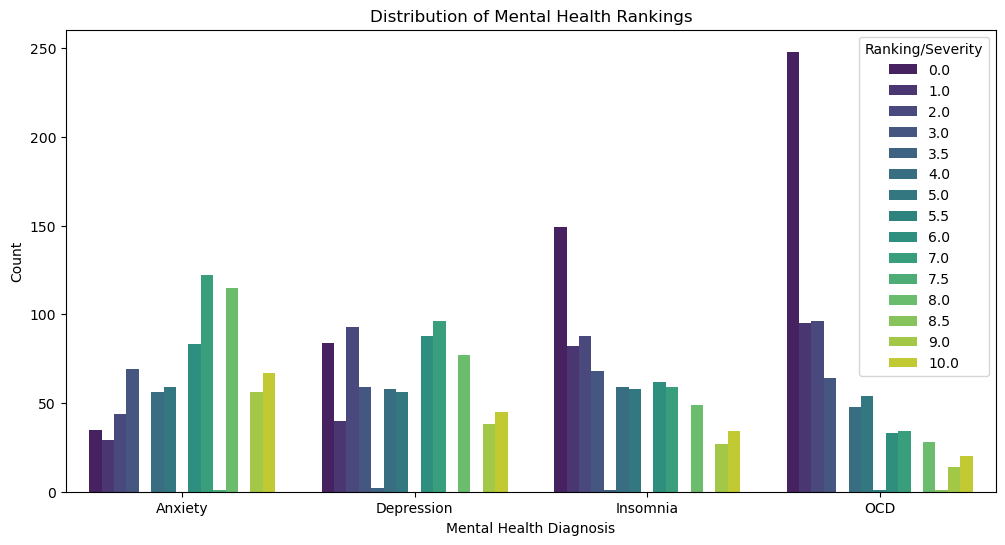

In [ ]:
plt.figure(figsize=(12, 6))

# Count plot of mental health rankings
sns.countplot(data=mxmh_df[['Anxiety', 'Depression', 'Insomnia', 'OCD']].melt(), x='variable', hue='value', palette='viridis')

plt.title('Distribution of Mental Health Rankings')
plt.xlabel('Mental Health Diagnosis')
plt.ylabel('Count')
plt.legend(title='Ranking/Severity', bbox_to_anchor=(1, 1))
plt.show()

A majority of individuals report med-high anxiety. Lower prevalence of insomnia and very low indication of OCD. 

### 278k Emotion Labeled Spotify Songs EDA